In [1]:
%matplotlib inline

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
START = pd.to_datetime(dt.datetime(2000, 1, 1))
END = pd.to_datetime(dt.datetime(2022, 3, 31))

def filter_data(df):
    result = df.copy()
    result["Date"] = pd.Series([pd.to_datetime(dt.datetime(r.Year, r.Month, r.Day)) for r in result.itertuples()])
    return result[(result["Date"] >= START) & (result["Date"] <= END)]

syd_df = pd.read_excel("../data/BOM_Non_VIC_20220414.xlsx", sheet_name="Sydney", usecols="B:E")
syd_df = filter_data(syd_df)

In [3]:
agg = syd_df[['Year','Month', 'Rainfall']].groupby([syd_df['Year'], syd_df['Month']]).agg({'Year': 'first', 'Month': 'first', 'Rainfall': 'sum' })
df = pd.DataFrame({
    "Dates": pd.Series([pd.to_datetime(dt.datetime(a.Year, a.Month, 1)) for a in agg.itertuples()]),
    "Rainfall": agg["Rainfall"].values
})

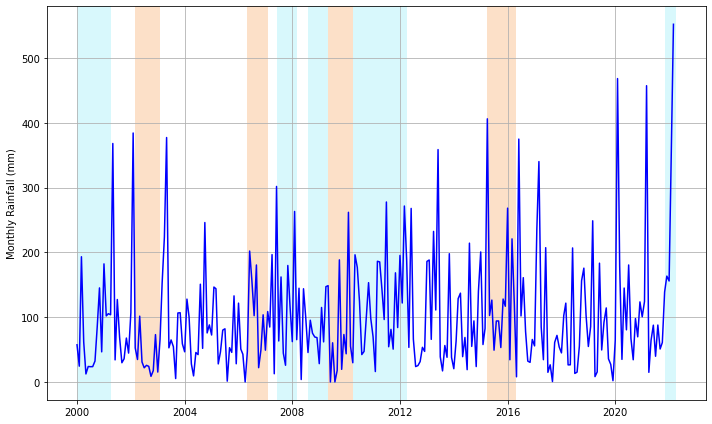

In [4]:
from climate import draw_la_nina_spans, draw_el_nino_spans

fig, ax = plt.subplots(figsize=(10, 6))

draw_la_nina_spans(ax)
draw_el_nino_spans(ax)

ax.grid(True)

ax.plot(df["Dates"], df["Rainfall"], color="blue")
ax.set_ylabel("Monthly Rainfall (mm)")

fig.tight_layout()
plt.show()